In [2]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Calculate the mean employee attrition in the population
mean_attrition_pop = attrition_pop['Attrition'].mean()

# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
relative_error = 100 * abs(mean_attrition_srs - mean_attrition_pop) / mean_attrition_pop

print(relative_error)

62.78481012658227


### Relative error of the sample mean for n = 100

In [3]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_srs100 - mean_attrition_pop) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


### Calculationg the mean attrition to create 500 sample means

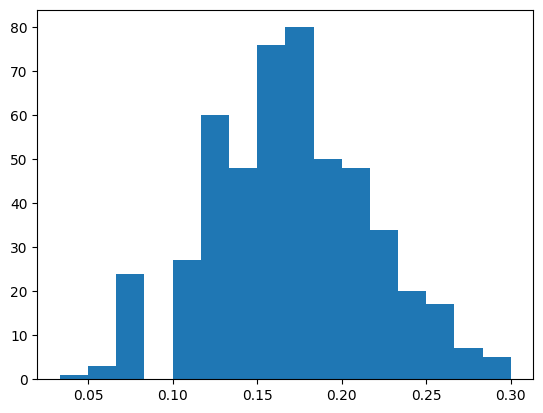

In [4]:
import matplotlib.pyplot as plt

# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
    mean_attritions.append(
        attrition_pop.sample(n=60)['Attrition'].mean()
    )

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

### Expand grid

In [7]:
import itertools

def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
    {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
     'die2': [1, 2, 3, 4, 5, 6, 7, 8],
     'die3': [1, 2, 3, 4, 5, 6, 7, 8],
     'die4': [1, 2, 3, 4, 5, 6, 7, 8],
     'die5': [1, 2, 3, 4, 5, 6, 7, 8],
     }
)

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


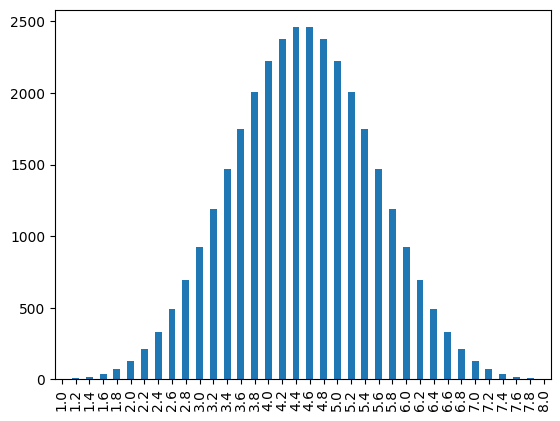

In [10]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] +
                     dice['die3'] + dice['die4'] +
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

In [11]:
import numpy as np

# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.6


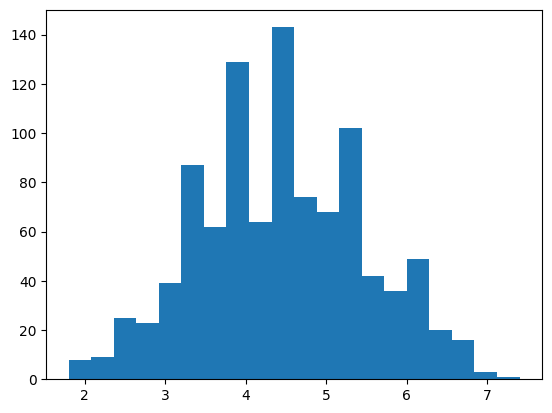

In [12]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

In [24]:
np.random.seed(2022)

sampling_distribution_5 = []
for i in range(1000):
    sampling_distribution_5.append(
        np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

sampling_distribution_50 = []
for i in range(1000):
    sampling_distribution_50.append(
        np.random.choice(list(range(1, 9)), size=50, replace=True).mean()
    )

sampling_distribution_500 = []
for i in range(1000):
    sampling_distribution_500.append(
        np.random.choice(list(range(1, 9)), size=500, replace=True).mean()
    )

# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

4.469
4.51086
4.504612


In [26]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

1.062227530864893
0.3384993976984926
0.09907173494324535
